In [1]:
!pip install tensorflow

In [2]:
import zipfile
import os

# chemin du Zip et dossier
zip_path = "C:/Users/hp/Desktop/SIDATA M2/machine learning/archive.zip"
extract_dir = "obstacles dataset"

# Extraction
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Extraction terminée vers :", extract_dir)




✅ Extraction terminée vers : obstacles dataset


In [3]:
#  contenu du dossier principal
print("Contenu du dossier principal :", os.listdir(extract_dir))

inner_dir = os.path.join(extract_dir, os.listdir(extract_dir)[0])  # récupère le premier sous-dossier
print("Contenu du sous-dossier :", os.listdir(inner_dir))

train_path = os.path.join(inner_dir, "train")
test_path = os.path.join(inner_dir, "test")

print("Train :", os.listdir(train_path)[:5])
print("Test :", os.listdir(test_path)[:5])


Contenu du dossier principal : ['obstacles dataset', 'training.1600000.processed.noemoticon.csv']
Contenu du sous-dossier : ['test', 'train']
Train : ['chair', 'door', 'fence', 'garbage_bin', 'obstacle']
Test : ['chair', 'door', 'fence', 'garbage_bin', 'obstacle']


In [4]:
#importation  des bibliothéques 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


In [5]:
#prétraitement des images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen = ImageDataGenerator(rescale=1./255)#normalisation des pixels 


In [6]:
#création des labels binaires et redimensionnement
train_generator = train_datagen.flow_from_directory(
    train_path, target_size=(128,128), batch_size=32, class_mode='categorical')
test_generator = datagen.flow_from_directory(
    test_path, target_size=(128,128), batch_size=32, class_mode='categorical',shuffle=False)

num_classes = len(train_generator.class_indices)
print("Classes :", train_generator.class_indices)

Found 3132 images belonging to 10 classes.
Found 432 images belonging to 10 classes.
Classes : {'chair': 0, 'door': 1, 'fence': 2, 'garbage_bin': 3, 'obstacle': 4, 'plant': 5, 'pothole': 6, 'stairs': 7, 'table': 8, 'vehicle': 9}


In [7]:
#model CNN
dropout_rate = 0.4
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128,128, 3)),
    BatchNormalization(),  
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),  
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),  
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
      Dropout(dropout_rate),
    Dense(num_classes, activation='softmax')
])

model.summary()


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,826 (12.61 MB)

 Trainable params: 3,306,378 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [8]:
from tensorflow.keras.optimizers import Adam
l_rate = 1e-4
#entrainement & compilation 
model.compile(optimizer=Adam(learning_rate=l_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30,
    callbacks=[early_stop]
)


Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.3665 - loss: 2.0510 - val_accuracy: 0.0278 - val_loss: 6.1119
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 94s 953ms/step - accuracy: 0.4757 - loss: 1.5605 - val_accuracy: 0.1227 - val_loss: 7.0331
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 98s 995ms/step - accuracy: 0.5077 - loss: 1.4612 - val_accuracy: 0.1574 - val_loss: 5.2751
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.5361 - loss: 1.3697 - val_accuracy: 0.2384 - val_loss: 3.7206
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.5731 - loss: 1.2763 - val_accuracy: 0.4861 - val_loss: 1.6902
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.5884 - loss: 1.2217 - val_accuracy: 0.6019 - val_loss: 1.3635
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.6086 - loss: 1.1694 - val_accuracy: 0.5324 - val_loss: 1.3829
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.6312 - loss: 1.1006 - val_accuracy: 0.6597

In [9]:
#evaluation 
loss, accuracy = model.evaluate(test_generator)
print(f'Loss: {loss}, Accuracy: {accuracy}')




14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 249ms/step - accuracy: 0.6620 - loss: 1.0189 
Loss: 1.0188592672348022, Accuracy: 0.6620370149612427


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step 


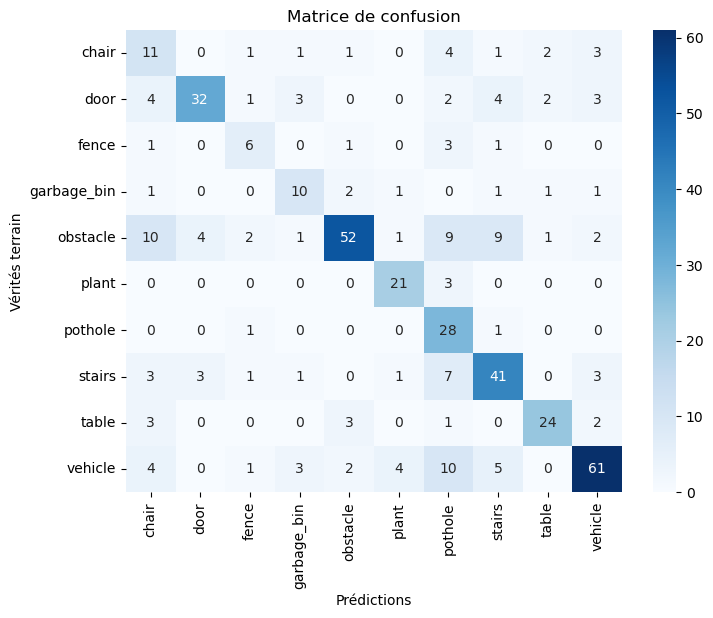


Rapport de classification :

              precision    recall  f1-score   support

       chair       0.30      0.46      0.36        24
        door       0.82      0.63      0.71        51
       fence       0.46      0.50      0.48        12
 garbage_bin       0.53      0.59      0.56        17
    obstacle       0.85      0.57      0.68        91
       plant       0.75      0.88      0.81        24
     pothole       0.42      0.93      0.58        30
      stairs       0.65      0.68      0.67        60
       table       0.80      0.73      0.76        33
     vehicle       0.81      0.68      0.74        90

    accuracy                           0.66       432
   macro avg       0.64      0.66      0.63       432
weighted avg       0.72      0.66      0.67       432



In [17]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#predictions 
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
#recup des vraies classes
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# --- ⿣ Matrice de confusion ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérités terrain')
plt.show()

# --- ⿤ Rapport de classification ---
print("\nRapport de classification :\n")
print(classification_report(y_true, y_pred, target_names=class_names))


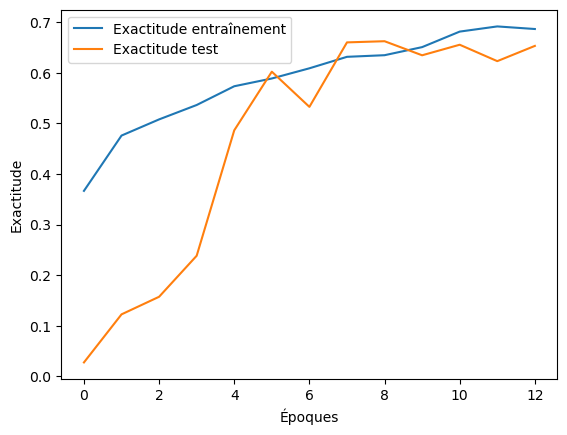

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Exactitude entraînement')
plt.plot(history.history['val_accuracy'], label='Exactitude test')
plt.xlabel('Époques')
plt.ylabel('Exactitude')
plt.legend()
plt.show()

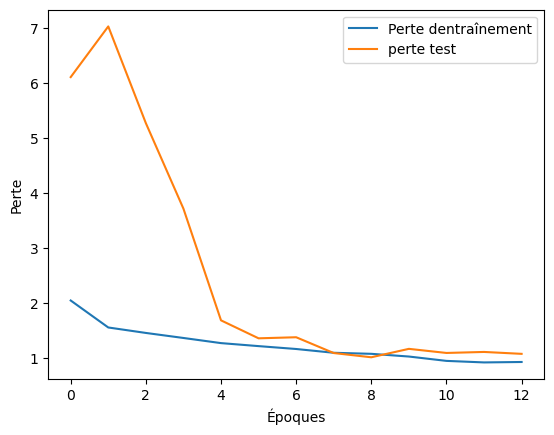

In [18]:
plt.plot(history.history['loss'], label='Perte dentraînement')
plt.plot(history.history['val_loss'], label='perte test')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

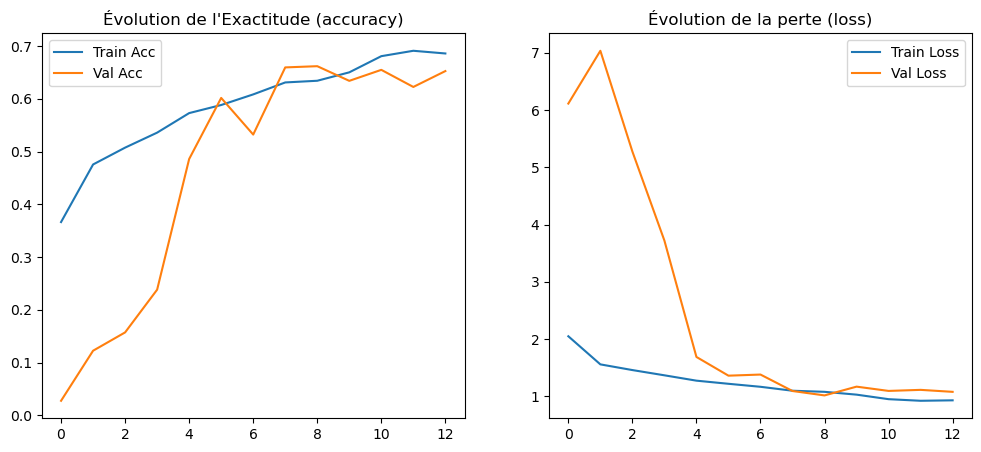

In [21]:
#COURBES D’APPRENTISSAGE
#============================================================

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Évolution de l'Exactitude (accuracy)")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Évolution de la perte (loss)")
plt.show()